In [1]:
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
from math import pi,sin,cos,acos,asin
import numpy as np
import seaborn as sns
from scipy.stats import linregress
import math
from ml_metrics import rmse,mae
from matplotlib.ticker import FormatStrFormatter
from scipy.optimize import minimize

In [1]:
import pandas as pd
#Read Original CSV file

import numpy as np
#Work with data in CSV file as arrays

from datetime import datetime,timedelta
#Read timeframe 

In [2]:
df = pd.read_csv('solar-measurements_vietnam_bacninh_wb-esmap_qc.csv')
# Read CSV file in the folder

df['UT_Time']= df.JulianTime.apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
# Create a new column by reading each parameter of Universal Time

df['LocalTime'] = df['UT_Time'] + timedelta(hours = 7)
# Convert the Universal Time into Local Time range

In [3]:
def yearr(LocalTime):
    return float(datetime.strftime(LocalTime,'%Y'))
# Generate a function with Year as the variable

df['Yearr'] = df.LocalTime.apply(lambda x:(yearr(x)))
# Create a column containing year value in parallel with each row

d = np.array((df[['LocalTime','DHI', 'DNI', 'GHI']])[df['Yearr'] == 2019])
# Forming a dataset with concerning column and time range

df_dataselection = pd.DataFrame(data=d)
# Transform the dataset into DataFrame by panda

df_dataselection.to_csv('DataProfile.csv')
# Save the dataframe into CSV file

In [6]:
d = np.array(df[(df['Yearr'] == 2019)])
Time = np.array(df.UT_Time[(df['Yearr'] == 2019)])
df_modelformation = pd.DataFrame(data=d)#,index=Time)
df_modelformation.to_csv('test2.csv')

In [13]:
d = np.array((df[['LocalTime','DHI_ThPyra2_Wm-2_avg', 'DNI_ThPyrh1_Wm-2_avg', 'GHI_ThPyra1_Wm-2_avg']])[df['Yearr'] == 2019])
Time = np.array(df.UT_Time[(df['Yearr'] == 2019)])
df_modelformation = pd.DataFrame(data=d)
df_modelformation.to_csv('DataProfile.csv')

In [12]:
d = np.array((df.loc[:, df.columns.isin(['LocalTime','DHI_ThPyra2_Wm-2_avg', 'DNI_ThPyrh1_Wm-2_avg', 'GHI_ThPyra1_Wm-2_avg'])])[df['Yearr'] == 2019])
Time = np.array(df.UT_Time[(df['Yearr'] == 2019)])
df_modelformation = pd.DataFrame(data=d)
df_modelformation.to_csv('DataSelection.csv')

In [ ]:
DHI_ThPyra2_Wm-2_avg
DNI_ThPyrh1_Wm-2_avg

In [ ]:
[['nnn', 'mmm', 'yyy']]
df.loc[:, df.columns.isin(['nnn', 'mmm', 'yyy', 'zzzzzz'])]

In [3]:
def hour(UT_Time):
    #local_time = UT_Time + timedelta(hours = 7)
    return float(datetime.strftime(UT_Time,'%H'))
df['Hour'] = df.UT_Time.apply(lambda x:(hour(x)))

In [4]:
def month(UT_Time):
    #local_Time = UT_Time + timedelta(hours = 7)
    return float(datetime.strftime(UT_Time,'%m'))
df['Month'] = df.UT_Time.apply(lambda x:(month(x)))

In [5]:
def minute(UT_Time):
    return float(datetime.strftime(UT_Time,'%M'))
df['Minute'] = df.UT_Time.apply(lambda x:(minute(x)))

In [5]:
def year(UT_Time):
    return float(datetime.strftime(UT_Time,'%Y'))
df['Year'] = df.UT_Time.apply(lambda x:(year(x)))

In [7]:
def day(UT_Time):
    return float(datetime.strftime(UT_Time,'%d'))
df['Day'] = df.UT_Time.apply(lambda x:(day(x)))

In [8]:
def cosd(b):
    return cos(math.radians(b))
def sind(a):
    return sin(math.radians(a))
def acosd(d):
    return math.degrees(acos(d))
def asind(c):
    return math.degrees(asin(c))

In [9]:
def cos_zenith(UT_Time):
    local_time = UT_Time + timedelta(hours = 7)
    LC_Hour= float(datetime.strftime(local_time,'%H')) + float(datetime.strftime(local_time,'%M'))/60
    DOY = local_time.timetuple().tm_yday
    lat=21.02851
    loc=105.804817
    #HourAngle
    B = 360/364 *(DOY-81)
    E = 0.165* sind(2*B) - 0.126* cosd(B) - 0.025*sind(B)
    LST = LC_Hour + (105 - loc)/15 + E
    h = 15*(LST-12)
    #SolarDeclinationOfTheSun
    #sin_d = sin(-23.44)*cos(0.98565*(DOY+10) + 1.914*sin⁡(0.98565*(DOY-2)))
    sin_D = sind(-23.44)*cosd(0.98565*(DOY+10) + 1.914*sind(0.98565*(DOY-2)) )
    D= asind(sin_D)
    #d = asin(-)
    if (sind(lat)*sind(D) + cosd(lat)*cosd(D)*cosd(h)) <= 0:
        return 0
    if (sind(lat)*sind(D) + cosd(lat)*cosd(D)*cosd(h)) >0:
        return sind(lat)*sind(D) + cosd(lat)*cosd(D)*cosd(h)

In [10]:
df['calculated_GHI']= df.UT_Time.apply(lambda x:(1007.31*cos_zenith(x)-74.09).real
                                       if (1007.31*cos_zenith(x)-74.09).real > 0
                                       else 0)

In [15]:
clearsky_GHI = np.array(df.calculated_GHI)
realtime_GHI = np.array(df.GHI_realtime)

In [59]:
GHI_clear_plot = np.array(df.calculated_GHI[(df['Year'] == 2018) & (df['Month'] == 12)])
GHI_real_plot = np.array(df.GHI_realtime[(df['Year'] == 2018) & (df['Month'] == 12)])
time = np.array(df.LocalTime[(df['Year'] == 2018) & (df['Month'] == 12)])

In [19]:
#& (df['Day'].isin([20,21,22,23,24,25,26,27])

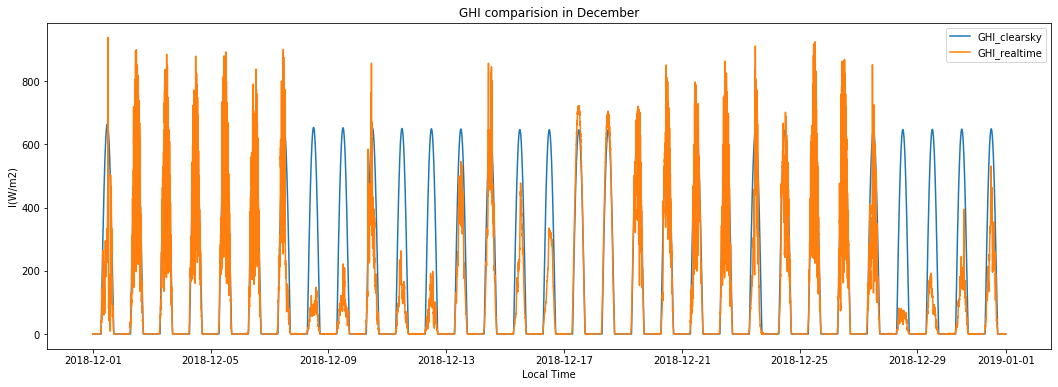

In [60]:
plt.figure(figsize=(18,6))
#ax=plt.subplot()

#num_hour = [i for i in range(len(GHI_clear_plot))]
#GHI_clear_plot = [GHI_clearsky[i] for i in range(24)]
#GHI_real_plot = [GHI_realtime[i] for i in range(24)]
plt.plot(time, GHI_clear_plot, label = "GHI_clearsky")
plt.plot(time, GHI_real_plot, label = "GHI_realtime")
plt.xlabel('Local Time')
plt.ylabel('I(W/m2)')
plt.title('GHI comparision in December')
plt.legend()
plt.show()

In [12]:
#GHI_clear_model = np.array(df.calculated_GHI[(df['Year'] == 2018) & (df['Minute'] == 0)])
BNI_real_model = np.array(df.BNI_realtime[(df['Year'] == 2018) & (df['Minute'] == 0)])
Time = np.array(df.UT_Time[(df['Year'] == 2018) & (df['Minute'] == 0)])
df_modelformation = pd.DataFrame(data = BNI_real_model, index=Time)
df_modelformation.to_csv('MODEL_FORMATION_BNI.csv')

In [13]:
df_modelformation = pd.DataFrame(data = BNI_real_model, index=Time)
df_modelformation.to_csv('MODEL_FORMATION_BNI.csv')